# PART III - Machine Learning
#####  @ Haim Goldfisher

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #(divide into train/test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics #(vital for notebook)
from sklearn.metrics import mean_squared_error, confusion_matrix


# DATASET Num 2 : REGRESSION

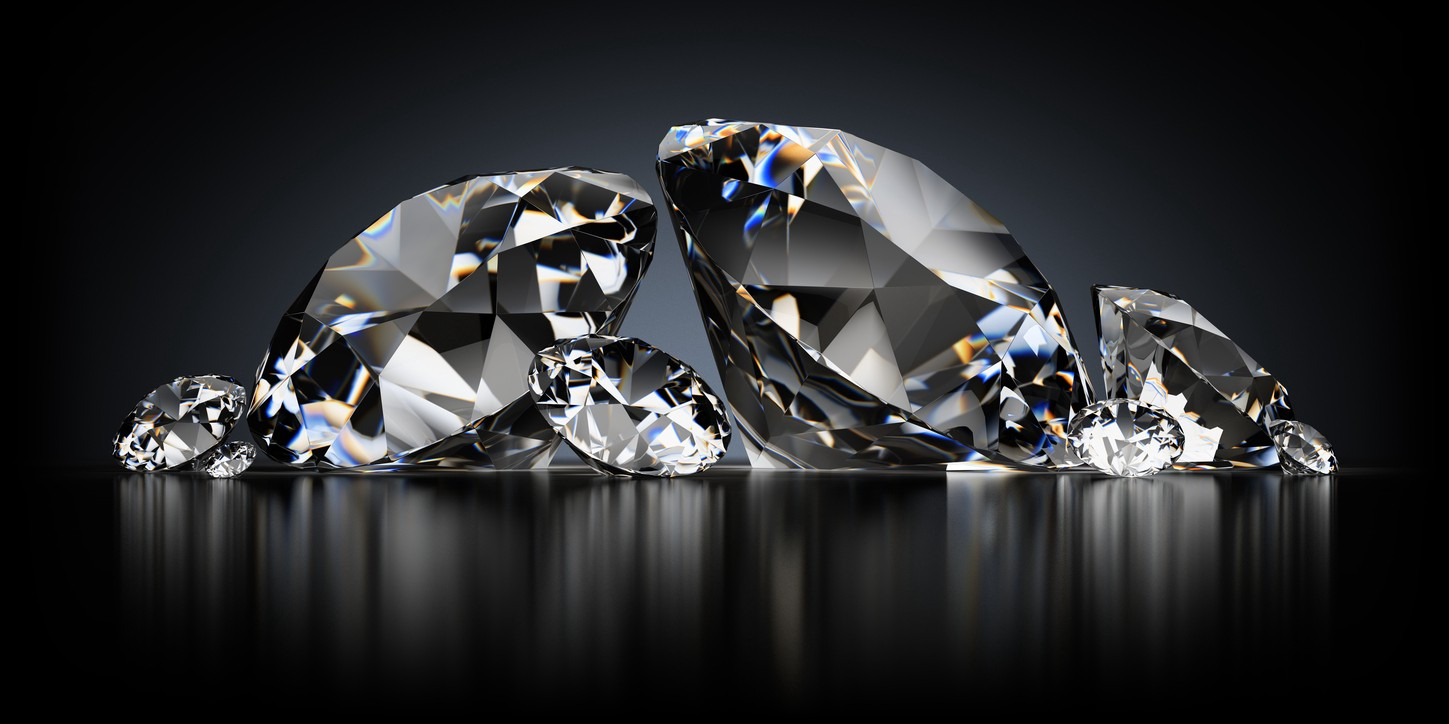

### Quick review:
##### Link to the dataset: https://www.kaggle.com/shivam2503/diamonds
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.
I would like to create a model which will predict the connection between the "" of the diamond and it's price.
The things that we going to find out:
- Is there a connection between "" and the diamond's price?
- Do people are likly to pay a high price on a diamond because of it's look or it's quality?

Firstly, we will upload the dataset:

In [250]:
diamonds = pd.read_csv('C:\Haim\Anaconda\diamonds.csv')

diamonds # display the first and last 5 rows

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

There are 10 attributes included in the dataset including the target ie. price.

###### Feature description:

- **Price:** price in US dollars ($\$$326 - $\$$18,823) This is the target column containing tags for the features. 

###### The 4 Cs of Diamonds:

- **Carat:** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

- **Cut:** (Fair$\rightarrow$Good$\rightarrow$Very Good$\rightarrow$Premium$\rightarrow$Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

- **Color:** from J (worst) to D (best). The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

- **Clarity:** (I1 (worst)$\rightarrow$SI2$\rightarrow$SI1$\rightarrow$VS2$\rightarrow$VS1$\rightarrow$VVS2$\rightarrow$VVS1$\rightarrow$IF (best)). Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

###### Dimensions:

- **Depth:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.

- **Table:** The width of the diamond's table expressed as a percentage of its average diameter.

- **X:** Length in mm (0-10.74).

- **Y:** Width in mm (0-58.9).

- **Z:** Depth in mm (0-31.8).

###### What else do we know?
- Because the response variable is continuous, this is a **regression** problem. 

In [105]:
diamonds.shape

(53940, 11)

In [106]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


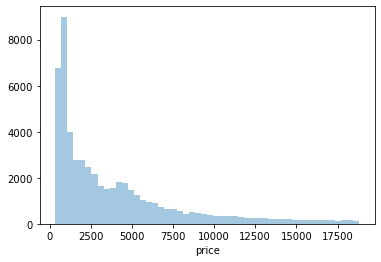

In [107]:
sns.distplot(diamonds['price'],kde=False)

In [108]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Data Preprocessing

- Data cleaning.
- Identifying and removing outliers.
- Encoding categorical variables.

In [109]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [110]:
diamonds.duplicated().sum()

0

As you can see, the dataset has no null data, it also has no duplicated rows.

In [111]:
diamonds.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

Let's take a look at the x,y,z columns. In the min's row, we have some illegal values. Those diamonds are dimensionless, or lost one of the dimensions. We must filter out those as it clearly faulty data points

In [252]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

We had at the start 53,940 diamonds, now we have 53,920. It means that we "lost" only 20 diamonds.

I decided to remove some unnecessary columns.
It seems that the first column present the index of the row. We will drop it:

In [251]:
diamonds.drop('Unnamed: 0', axis = 1, inplace = True) # its just index

diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

As we saw, cut, color aand clarity are ordinal data. We would like to make them numerical so 1 will present the worst and the biggest number will present the best.
Firstly, we would like to understand what do those columns icluded.

In [114]:
diamonds['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

According to the explantionfor, the order is: Fair, Good, Very Good, Premium, Ideal.

So that, we would like to set the order:

1 - Fair

2 - Good

3 - Very Good

4 - Premium

5 - Ideal

In [14]:
diamonds['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

According to the explantionfor, D is the best and J is the worst.

So that, we would like to set the order:

1 - J

2 - I

3 - H

4 - G

5 - F

6 - E

7 - D

In [15]:
diamonds['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

According to the explantionfor, the order from best to worst: FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

So that, we would like to set the order:

1 - I3 (level 3 inclusions)

2 - I2

3 - I1

4 - SI2

5 - SI1

6 - VS2

7 - VS1

8 - VVS2

9 - VVS1

10 - IF

11 - FL (flawless)

In [253]:
#prepertion - categorical variables

diamonds['cut'] = diamonds['cut'].map({
    'Ideal'        :5,
    'Premium'      :4,
    'Very Good'    :3,
    'Good'         :2,
    'Fair'         :1
})

diamonds['color'] = diamonds['color'].map({
    'D'            :7,
    'E'            :6,
    'F'            :5,
    'G'            :4,
    'H'            :3,
    'I'            :2,
    'J'            :1
})
diamonds['clarity'] = diamonds['clarity'].map({
    'FL'            :11,
    'IF'            :10,
    'VVS1'          :9,
    'VVS2'          :8,
    'VS1'           :7,
    'VS2'           :6,
    'SI1'           :5,
    'SI2'           :4,
    'I1'            :3,
    'I2'            :2,
    'I13'           :1
})

diamonds

carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    5      6        4   61.5   55.0    326  3.95  3.98  2.43
1       0.21    4      6        5   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      6        7   56.9   65.0    327  4.05  4.07  2.31
3       0.29    4      2        6   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      1        4   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    5      7        5   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    2      7        5   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    3      7        5   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    4      3        4   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    5      7        4   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model.

- "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
- The "depth" should be capped but we must examine the regression line to be sure.
- The "table" featured should be capped too.
- Let's have a look at regression plots to get a close look at the outliers.

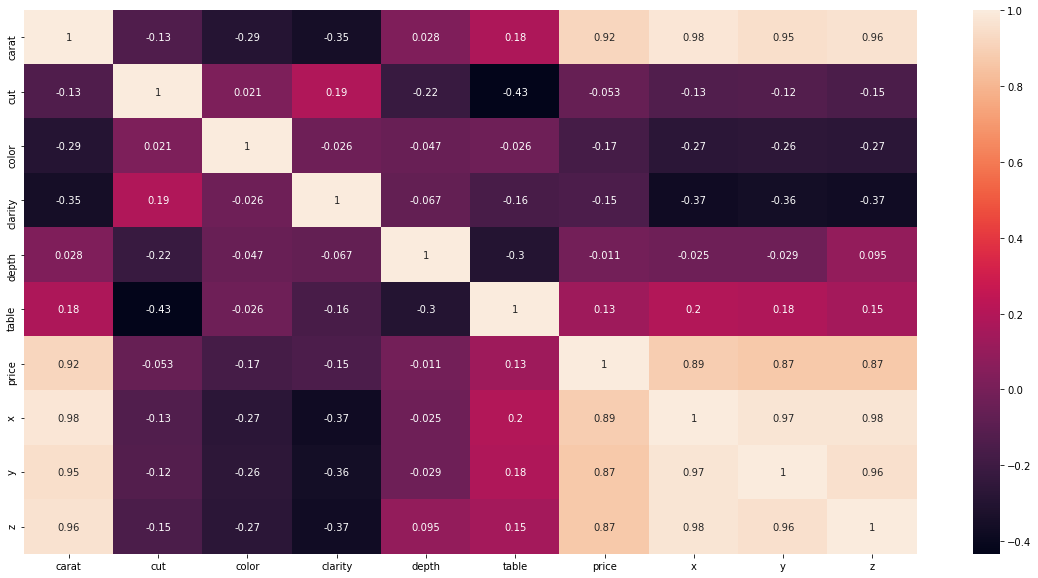

In [116]:
#i want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(diamonds.corr(), annot=True)

The heatmap tells us the biggest story. We can infer that:
- The carat is the biggest factor to determine the price of a diamond. It obviously that X,Y and Z have a direct impact on the carat weight. The other features have a small value compare to it. It makes me think what would happen if we didn't have the size of the diamond. However, we can understand that the size means a lot when it comes to diamonds.
- If the carat has direct impact from the x,y,z values, maybe those columns are useless for the model. Because all those columns tell the same story. Moreover, maybe that fact can make our model unstable (to much weight to the size).
- "depth", "cut" and "table" show low correlation. We could consider dropping it.
- Diamonds are symetric. That fact has no connection to our model, but we can see that there is a huge correlation between x,y and z.

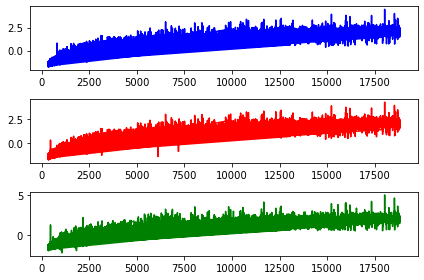

In [319]:
plt.subplot(3,1,1)
plt.plot(diamonds["price"],diamonds["x"], color='blue')

plt.subplot(3,1,2)
plt.plot(diamonds["price"],diamonds["y"], color='red')

plt.subplot(3,1,3)
plt.plot(diamonds["price"],diamonds["z"], color ='green')

plt.tight_layout() #more space

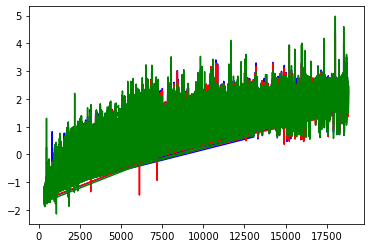

In [318]:
plt.plot(diamonds["price"],diamonds["x"], color='blue',); #exponential
plt.plot(diamonds["price"],diamonds["y"], color='red'); #exponential
plt.plot(diamonds["price"],diamonds["z"], color='green'); #exponential

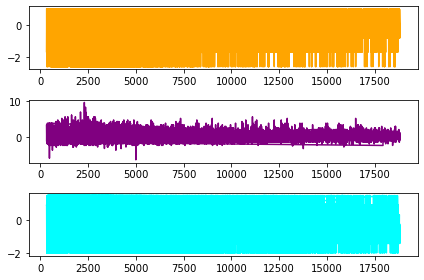

In [321]:
plt.subplot(3,1,1)
plt.plot(diamonds["price"],diamonds["cut"], color='orange')

plt.subplot(3,1,2)
plt.plot(diamonds["price"],diamonds["table"], color='purple')

plt.subplot(3,1,3)
plt.plot(diamonds["price"],diamonds["color"], color ='cyan')


plt.tight_layout() #more space

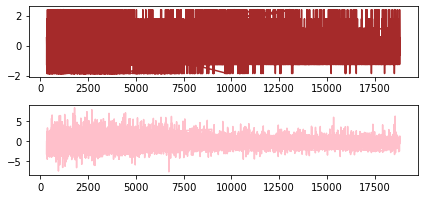

In [323]:
plt.subplot(3,1,1)
plt.plot(diamonds["price"],diamonds["clarity"], color ='brown')

plt.subplot(3,1,2)
plt.plot(diamonds["price"],diamonds["depth"], color ='pink')

plt.tight_layout() #more space

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

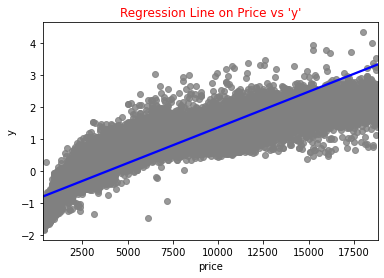

In [330]:
ax = sns.regplot(x="price", y="y", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'y'", color="red")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

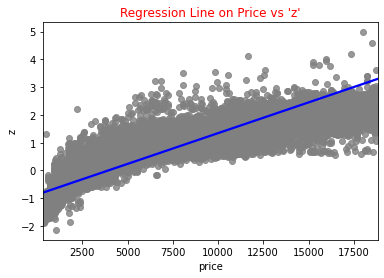

In [329]:
ax= sns.regplot(x="price", y="z", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'z'", color="red")

Text(0.5, 1.0, 'Regression Line on Price vs carat')

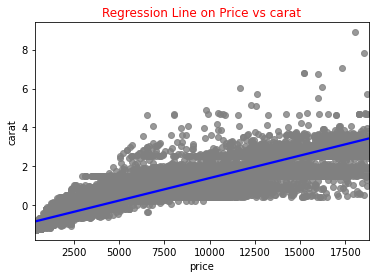

In [331]:
ax= sns.regplot(x="price", y="carat", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs carat", color="red")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

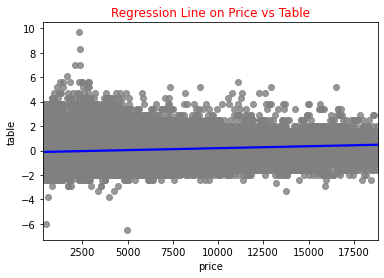

In [332]:
ax=sns.regplot(x="price", y="table", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Table", color="red")

# Outliers

In [260]:
#Dropping the outliers. לחשוב טוב מאוד מה אני רוצה להסיר
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["x"]<30)]
diamonds = diamonds[(diamonds["y"]<30)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]
diamonds.shape

(53907, 10)

Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

In [202]:
diamonds.describe()

carat           cut         color       clarity         depth  \
count  5.390700e+04  5.390700e+04  5.390700e+04  5.390700e+04  5.390700e+04   
mean   2.026439e-14  5.001403e-14 -4.502467e-15  2.878082e-14 -2.604493e-15   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.261456e+00 -2.602040e+00 -2.002020e+00 -1.852759e+00 -7.710509e+00   
25%   -8.393014e-01 -8.102885e-01 -8.264276e-01 -6.384822e-01 -5.279473e-01   
50%   -2.060702e-01  8.558742e-02 -2.386316e-01 -3.134408e-02  3.539086e-02   
75%    5.115918e-01  9.814633e-01  9.369603e-01  5.757941e-01  5.283118e-01   
max    8.891351e+00  9.814633e-01  1.524756e+00  2.397209e+00  8.344629e+00   

              table         price             x             y             z  
count  5.390700e+04  53907.000000  5.390700e+04  5.390700e+04  5.390700e+04  
mean   1.414927e-14   3930.584470  1.726139e-15 -3.029330e-15 -6.021152e-15  
std    1.000009e+00   3987.202815  1.000009e+00  1.000009e+00  1.000009e+00  
min   -6.493750e+00    326.000000 -1.788021e+00 -1.847745e+00 -2.139691e+00  
25%   -6.540259e-01    949.000000 -9.125311e-01 -9.118550e-01 -9.103499e-01  
50%   -2.048163e-01   2401.000000 -2.810776e-02 -2.095997e-02 -1.365394e-02  
75%    6.936029e-01   5322.000000  7.223121e-01  7.259521e-01  7.239508e-01  
max    9.677794e+00  18823.000000  4.474411e+00  4.325528e+00  4.976025e+00

# SCALING

In [261]:
features = ['carat','cut','color','clarity', 'depth', 'table', 'x','y','z']
ss = StandardScaler()
df = diamonds
df[features] = ss.fit_transform(df[features])
df.head(3)

carat       cut    color   clarity     depth     table  price         x  \
0 -1.198132  0.981463  0.93696 -1.245620 -0.175861 -1.103235    326 -1.591482   
1 -1.240348  0.085587  0.93696 -0.638482 -1.372955  1.592022    326 -1.645084   
2 -1.198132 -1.706164  0.93696  0.575794 -3.415055  3.388860    327 -1.502147   

          y         z  
0 -1.577777 -1.604566  
1 -1.703762 -1.778120  
2 -1.496786 -1.778120

## Model Building


- Setting up features and target
- Build pipeline of standard scalar and model for five different regressor.
- Fit all the models on training data
- Get mean of cross valdation on training set for all the models for negative root mean squre error
- Pick the model with best crossvalidation score
- Fit the best model on training set and get

In [333]:
# Assigning the featurs as X and trarget as y
y= df["price"]
X= df.drop(["price"],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [334]:
# equivalent command to do this in one line
#X = df[['carat', 'x', 'y', 'z']]

# print the first 5 rows
X.head()

carat       cut     color   clarity     depth     table         x  \
0 -1.198132  0.981463  0.936960 -1.245620 -0.175861 -1.103235 -1.591482   
1 -1.240348  0.085587  0.936960 -0.638482 -1.372955  1.592022 -1.645084   
2 -1.198132 -1.706164  0.936960  0.575794 -3.415055  3.388860 -1.502147   
3 -1.071486  0.085587 -1.414224 -0.031344  0.457894  0.244393 -1.368143   
4 -1.029271 -1.706164 -2.002020 -1.245620  1.091650  0.244393 -1.243073   

          y         z  
0 -1.577777 -1.604566  
1 -1.703762 -1.778120  
2 -1.496786 -1.778120  
3 -1.352803 -1.315309  
4 -1.244816 -1.141755

In [335]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(53907, 9)


In [336]:
# select a Series from the DataFrame
y = df['price']

# equivalent command that works if there are no spaces in the column name
y = df.price

# print the first 5 values
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [337]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(53907,)


In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [339]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('carat', 5183.657872777447),
 ('x', -3537.5626333248156),
 ('y', 3900.609814825464),
 ('z', -1896.0708470481686)]

# Dummy Regressor

In [340]:
dummy_regr_mean = DummyRegressor(strategy="mean")
dummy_regr_mean.fit(X_train, y_train)

print (mean_squared_error(y_test,dummy_regr_mean.predict(X_test), squared=False))

4017.7130828823597


In [344]:
dummy_regr_median = DummyRegressor(strategy="median")
dummy_regr_median.fit(X_train, y_train)
y_pred = dummy_regr_median.predict(X_test)
err_dummy = mean_squared_error(y_test,dummy_regr_median.predict(X_test), squared=False)


print("R2 Score:",metrics.r2_score(y_test, y_pred))
print ("Mean Square ERR:",mean_squared_error(y_test,dummy_regr_median.predict(X_test), squared=False))

R2 Score: -0.15285646773130512
Mean Square ERR: 4313.555258065412


# KNN

In [342]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
initial_prediction_knn = knn.predict(X_test)
y_pred = knn.predict(X_test)

print("R2 Score:",metrics.r2_score(y_test, y_pred))
print ("Mean Square ERR:",mean_squared_error(y_test,initial_prediction_knn, squared=False))

R2 Score: 0.9666895140924104
Mean Square ERR: 733.226629892024


### Cross validation:

In [233]:
knn_reg_scores = cross_val_score(KNeighborsRegressor(),X_train, y_train, cv=5, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(),X_train, y_train, cv=5, scoring="r2")

#print(knn_reg_scores)
#print(knn_reg_scores_r2)

print("After cross validation:\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

After cross validation:

R2 Score: 0.9663017227061402
Mean Square ERR: 730.032401082801


In [234]:
results = {}
results["Predicted"] = initial_prediction_knn.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576     4519.2     5038
45207     1711.8     1656
52940     2242.2     2592
212       3119.4     2780
983       2508.6     2896
...          ...      ...
38602      977.6     1038
43574     1597.4     1431
28011      607.0      658
39177      932.4     1063
45060     1526.6     1641

[13477 rows x 2 columns]

# Linear Regression

In [216]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
initial_prediction_lr = linear_reg.predict(X_test)

print(linear_reg.score(X_test,y_test))
print(mean_squared_error(y_test,initial_prediction_lr, squared=False))

0.9116462804252423
1194.1535234543746


### Cross validation:

In [237]:
linear_reg_scores = cross_val_score(LinearRegression(),X_train, y_train,cv=5,scoring="neg_mean_squared_error", )
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=5,scoring="r2")

#print(linear_reg_scores)
#print(linear_reg_scores_r2)

print("After cross validation:\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-linear_reg_scores.mean()))

After cross validation:

R2 Score: 0.9067239918112374
Mean Square ERR: 1214.4593892453488


In [238]:
results = {}
results["Predicted"] = initial_prediction_lr.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576    5531.30     5038
45207    1913.92     1656
52940    2794.65     2592
212      3428.88     2780
983      3604.15     2896
...          ...      ...
38602     947.20     1038
43574    2674.56     1431
28011     334.06      658
39177    1003.78     1063
45060    1466.00     1641

[13477 rows x 2 columns]

# Conclusion

In [359]:
print("The score for the models:\n")
print("Dummy Regressor:     ",round(err_dummy,5),"  Mean Square ERR.")
print("KNN Regressor:       ",round(np.sqrt(-knn_reg_scores.mean()),5),"    Mean Square ERR.")
print("Linear Regression:   ",round(np.sqrt(-linear_reg_scores.mean()),5),"  Mean Square ERR.")

The score for the models:

Dummy Regressor:      4313.55526   Mean Square ERR.
KNN Regressor:        730.0324     Mean Square ERR.
Linear Regression:    1214.45939   Mean Square ERR.


## It can be concluded that KNN-Regressor is the most accurate model for our dataset, with 730.0324 Mean Square ERR.